In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [81]:
#df = pd.read_csv('/kaggle/input/hourly-energy-consumption/PJME_hourly.csv')
data = pd.read_csv('/kaggle/input/petr-brent-ipeadata/petr_brent.csv')
data.head()

,DATE,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (US$)
0,2002-01-01,EIA366_PBRENT366,2002-01-01T00:00:00-02:00,1,1,2002,NaN
1,2002-01-02,EIA366_PBRENT366,2002-01-02T00:00:00-02:00,2,1,2002,20.13
2,2002-01-03,EIA366_PBRENT366,2002-01-03T00:00:00-02:00,3,1,2002,20.47
3,2002-01-04,EIA366_PBRENT366,2002-01-04T00:00:00-02:00,4,1,2002,21.20
4,2002-01-05,EIA366_PBRENT366,2002-01-05T00:00:00-02:00,5,1,2002,NaN


In [82]:
data.tail()

,DATE,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (US$)
7595,2024-05-07,EIA366_PBRENT366,2024-05-07T00:00:00-03:00,7,5,2024,82.69
7596,2024-05-08,EIA366_PBRENT366,2024-05-08T00:00:00-03:00,8,5,2024,82.44
7597,2024-05-09,EIA366_PBRENT366,2024-05-09T00:00:00-03:00,9,5,2024,83.27
7598,2024-05-10,EIA366_PBRENT366,2024-05-10T00:00:00-03:00,10,5,2024,83.39
7599,2024-05-13,EIA366_PBRENT366,2024-05-13T00:00:00-03:00,13,5,2024,83.18


In [83]:
data.index = pd.to_datetime(data["DATE"])
start = data.index[0].date()
end = data.index[len(data) - 1].date()
new_dates = pd.date_range(start=start, end=end, freq="D")
data = data.reindex(new_dates)
data = data.rename_axis("DATE")

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8169 entries, 2002-01-01 to 2024-05-13
Freq: D
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         7600 non-null   object 
 1   CODE         7600 non-null   object 
 2   RAW DATE     7600 non-null   object 
 3   DAY          7600 non-null   float64
 4   MONTH        7600 non-null   float64
 5   YEAR         7600 non-null   float64
 6   VALUE (US$)  7459 non-null   float64
dtypes: float64(4), object(3)
memory usage: 510.6+ KB


In [85]:
data["VALUE (US$)"] = data["VALUE (US$)"].interpolate().bfill()

In [86]:
data.head()
#df = df.set_index("Datetime")

,DATE,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (US$)
DATE,,,,,,,
2002-01-01,2002-01-01,EIA366_PBRENT366,2002-01-01T00:00:00-02:00,1.0,1.0,2002.0,20.13
2002-01-02,2002-01-02,EIA366_PBRENT366,2002-01-02T00:00:00-02:00,2.0,1.0,2002.0,20.13
2002-01-03,2002-01-03,EIA366_PBRENT366,2002-01-03T00:00:00-02:00,3.0,1.0,2002.0,20.47
2002-01-04,2002-01-04,EIA366_PBRENT366,2002-01-04T00:00:00-02:00,4.0,1.0,2002.0,21.20
2002-01-05,2002-01-05,EIA366_PBRENT366,2002-01-05T00:00:00-02:00,5.0,1.0,2002.0,21.16


In [123]:
data = pd.DataFrame(data['VALUE (US$)'])

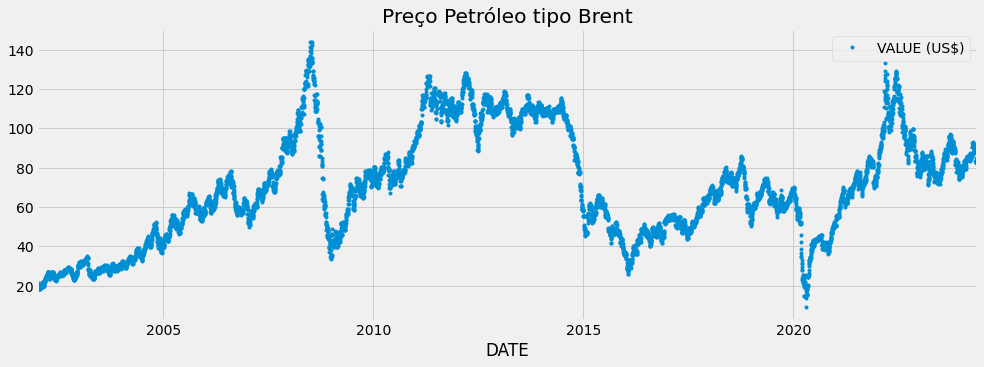

In [126]:
#df.plot(style='.', figsize=(15,5), color=color_pal[0], title = "PJME Energy Use in Mega walt (MW)");
data.plot(style='.', figsize=(15,5), color=color_pal[0], title = "Preço Petróleo tipo Brent");

In [125]:
px.line(data['VALUE (US$)'])

In [228]:
#df.index

In [229]:
#df.index = pd.to_datetime(df.index)

In [230]:
#df.index

In [231]:
#df.head()

In [232]:
# df.plot(style='.', 
#         figsize=(15,5),
#         color=color_pal[0],
#         title = "PJME Energy Use in Mega walt (MW)");

## Train & Test Split

In [233]:
# train = df.loc[df.index < '01-01-2015']
# test = df.loc[df.index > '01-01-2015' ]

# fig, ax = plt.subplots(figsize=(15,5))
# train.plot(ax=ax, label='Training Set', title = "Data Train/Test Split")
# test.plot(ax=ax, label='Testing Set')
# ax.axvline("01-01-2015", color='black', ls="--")
# ax.legend(["Training Set", "Testing Set"])
# plt.show()

In [127]:
cutofdate = '2023-09-01'

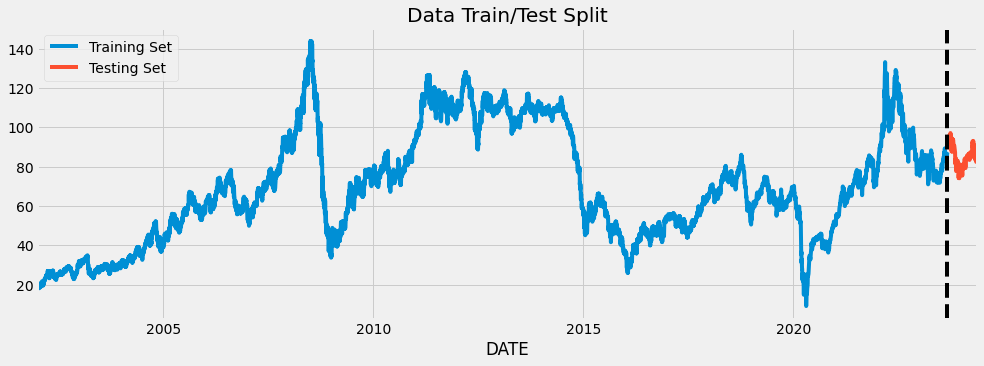

In [128]:
train = data.loc[data.index < cutofdate]
test = data.loc[data.index > cutofdate ]

fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='Training Set', title = "Data Train/Test Split")
test.plot(ax=ax, label='Testing Set')
ax.axvline("2023-09-01", color='black', ls="--")
ax.legend(["Training Set", "Testing Set"])
plt.show()

In [129]:
train['set'] = 'train'
test['set'] = 'test'
combined_df = pd.concat([train, test])
combined_df.tail()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,VALUE (US$),set
DATE,,
2024-05-09,83.27,test
2024-05-10,83.39,test
2024-05-11,83.32,test
2024-05-12,83.25,test
2024-05-13,83.18,test


In [130]:
# Plot with Plotly Express
fig = px.line(combined_df, x=combined_df.index, y='VALUE (US$)', color='set',
              color_discrete_map={'train': 'blue', 'test': 'red'},
              labels={'set': 'Dataset', 'date': 'Date', 'value': 'VALUE (US$)'},
              title='Train and Test Data Over Time')

# Show the plot
fig.show()

In [236]:
#df.loc[(df.index > "01-01-2015") & (df.index < "01-08-2015")]

In [237]:
#df.loc[(df.index > "01-01-2015") & (df.index < "01-08-2015")].plot(style='-', figsize=(15,5), color=color_pal[0], title = "Week of Data Energy Use in Mega walt (MW)");

## Features Creation

In [98]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.day_of_week
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.day_of_year
    return df

df = create_features(data)

In [99]:
df.head()

,DATE,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (US$),hour,dayofweek,quarter,month,year,dayofyear
DATE,,,,,,,,,,,,,
2002-01-01,2002-01-01,EIA366_PBRENT366,2002-01-01T00:00:00-02:00,1.0,1.0,2002.0,20.13,0,1,1,1,2002,1
2002-01-02,2002-01-02,EIA366_PBRENT366,2002-01-02T00:00:00-02:00,2.0,1.0,2002.0,20.13,0,2,1,1,2002,2
2002-01-03,2002-01-03,EIA366_PBRENT366,2002-01-03T00:00:00-02:00,3.0,1.0,2002.0,20.47,0,3,1,1,2002,3
2002-01-04,2002-01-04,EIA366_PBRENT366,2002-01-04T00:00:00-02:00,4.0,1.0,2002.0,21.20,0,4,1,1,2002,4
2002-01-05,2002-01-05,EIA366_PBRENT366,2002-01-05T00:00:00-02:00,5.0,1.0,2002.0,21.16,0,5,1,1,2002,5


In [100]:
df = df[['VALUE (US$)','hour','dayofweek','quarter','month','year','dayofyear']]

In [101]:
df.head()

,VALUE (US$),hour,dayofweek,quarter,month,year,dayofyear
DATE,,,,,,,
2002-01-01,20.13,0,1,1,1,2002,1
2002-01-02,20.13,0,2,1,1,2002,2
2002-01-03,20.47,0,3,1,1,2002,3
2002-01-04,21.20,0,4,1,1,2002,4
2002-01-05,21.16,0,5,1,1,2002,5


## Visualize our Feature/Target Relationship

In [102]:
# fig, ax = plt.subplots(figsize=(10,8))
# sns.boxplot(data=df, x="hour", y = "PJME_MW")
# ax.set_title("MW by Hour")
# plt.show()

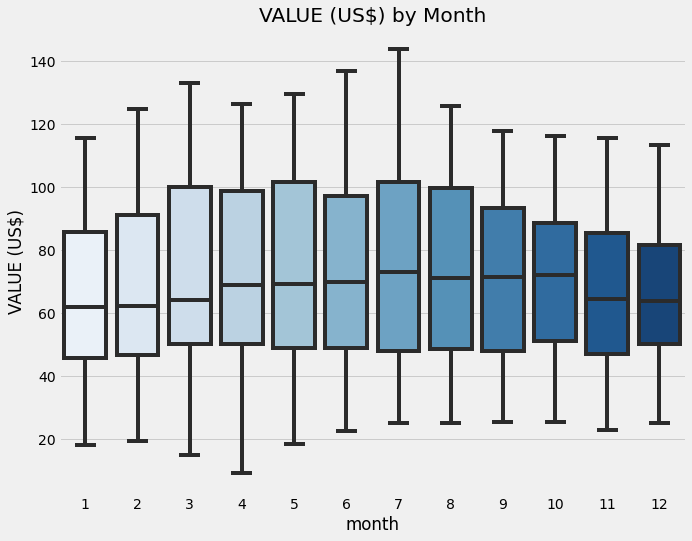

In [103]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x="month", y = "VALUE (US$)", palette= "Blues")
ax.set_title("VALUE (US$) by Month")
plt.show()

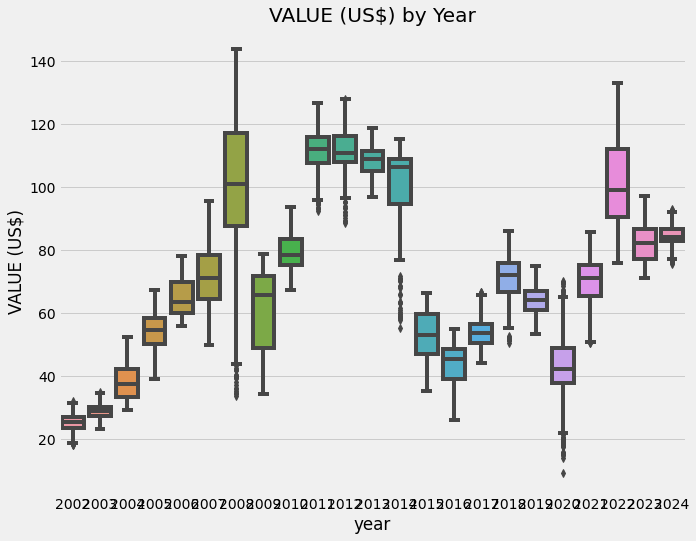

In [104]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x="year", y = "VALUE (US$)")
ax.set_title("VALUE (US$) by Year")
plt.show()

## Creating our Model

In [105]:
df.columns

Index(['VALUE (US$)', 'hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear'],
      dtype='object')

In [106]:
train = create_features(train)
test = create_features(test)

#FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']
FEATURES = ['hour','dayofweek', 'quarter', 'month', 'year', 'dayofyear']
#TARGET = 'PJME_MW'
TARGET = 'VALUE (US$)'

In [107]:
X_train = train[FEATURES]
y_train = train[TARGET]


X_test = test[FEATURES]
y_test = test[TARGET]

In [108]:
reg = xgb.XGBRegressor(n_estimators=50000, early_stopping_rounds = 50,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
       eval_set = [(X_train, y_train), (X_test, y_test)],
       verbose  = 100)

[0]	validation_0-rmse:73.72161	validation_1-rmse:84.28449
[100]	validation_0-rmse:28.03343	validation_1-rmse:34.21326
[200]	validation_0-rmse:11.70945	validation_1-rmse:14.77863
[300]	validation_0-rmse:6.29826	validation_1-rmse:8.41744
[400]	validation_0-rmse:4.31612	validation_1-rmse:6.53685
[500]	validation_0-rmse:3.51108	validation_1-rmse:6.12195
[600]	validation_0-rmse:3.04432	validation_1-rmse:5.88932
[700]	validation_0-rmse:2.64383	validation_1-rmse:5.85312
[710]	validation_0-rmse:2.62071	validation_1-rmse:5.84816


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=50000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

## Feature importances

In [109]:
reg.feature_importances_

array([0.0000000e+00, 1.5074067e-04, 2.3315899e-02, 6.2699795e-02,
       8.6658978e-01, 4.7243785e-02], dtype=float32)

In [110]:
fi = pd.DataFrame(data=reg.feature_importances_,
                 index = reg.feature_names_in_,
                 columns = ['importances'])

In [111]:
fi

,importances
hour,0.000000
dayofweek,0.000151
quarter,0.023316
month,0.062700
year,0.866590
dayofyear,0.047244


In [135]:
fi.sort_values('importances')

,importances
hour,0.000000
dayofweek,0.000151
quarter,0.023316
dayofyear,0.047244
month,0.062700
year,0.866590


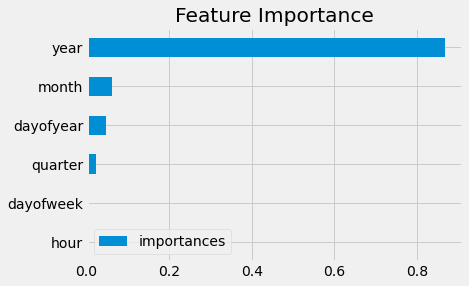

In [136]:
fi.sort_values('importances').plot(kind='barh', title="Feature Importance")
plt.show()

## Forecast on Test

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



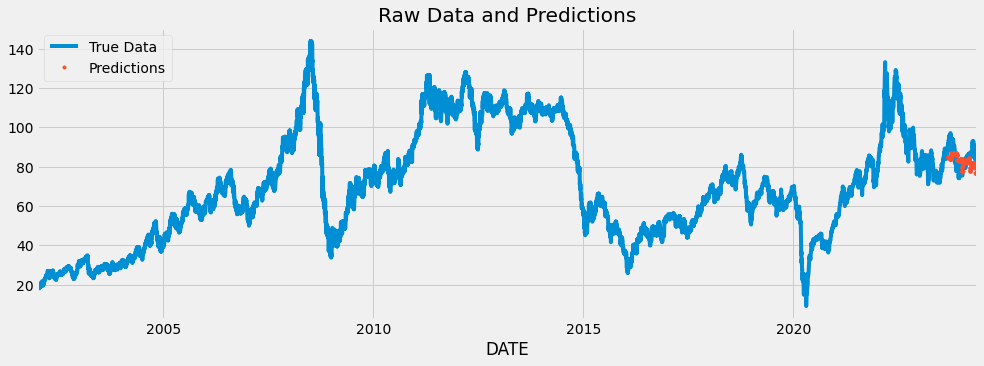

In [137]:
# test['predictions'] = reg.predict(X_test)
# df = df.merge(test['predictions'], how='left', left_index=True, right_index=True)
# ax = df['PJME_MW'].plot(figsize=(15,5))
# df['predictions'].plot(ax=ax, style='.')
# plt.legend(["True Data", "Predictions"])
# ax.set_title("Raw Data and Predictions")
# plt.show()
test['predictions'] = reg.predict(X_test)
df = df.merge(test['predictions'], how='left', left_index=True, right_index=True)
ax = df['VALUE (US$)'].plot(figsize=(15,5))
df['predictions'].plot(ax=ax, style='.')
plt.legend(["True Data", "Predictions"])
ax.set_title("Raw Data and Predictions")
plt.show()

In [218]:
predictions = pd.DataFrame(test['predictions'])
predictions.columns = ['VALUE (US$)']
predictions['set'] = 'predictions'

# Combine the dataframes
combined_df = pd.concat([train, test, predictions])
combined_df = combined_df[combined_df.index >= '2018-01-01']

# Reset index to use date as a column for Plotly Express
#combined_df.reset_index(inplace=True)

# Plot with Plotly Express
fig = px.line(combined_df, x=combined_df.index, y='VALUE (US$)', color='set',
              color_discrete_map={'train': 'blue', 'test': 'gray', 'predictions': 'black'},
              labels={'set': 'Dataset', 'date': 'Date', 'value': 'VALUE (US$)'},
              title='Train, Test, and Predictions Data Over Time')

# Show the plot
fig.show()

In [192]:
combined_df

,VALUE (US$),set,predictions
DATE,,,
2002-01-01,20.130000,train,NaN
2002-01-02,20.130000,train,NaN
2002-01-03,20.470000,train,NaN
2002-01-04,21.200000,train,NaN
2002-01-05,21.160000,train,NaN
...,...,...,...
2024-05-09,76.814232,predictions,NaN
2024-05-10,76.814232,predictions,NaN
2024-05-11,76.814232,predictions,NaN


In [70]:
# ax = df.loc[(df.index > "04-01-2018") & (df.index < "04-08-2018")]['PJME_MW'].plot(figsize=(15,5),title = "Week of Data");
# df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['predictions'].plot(style='.')
# plt.legend(["True Data", "Predictions"])
# plt.show()

In [211]:
# score = np.sqrt(mean_squared_error(test['PJME_MW'], test['predictions']))
# print(f"RMSE Score on Test set: {score:0.2f}")

rmse = np.sqrt(mean_squared_error(test['VALUE (US$)'], test['predictions']))
mae = mean_absolute_error(test['VALUE (US$)'], test['predictions'])
mase = mean_absolute_error(test['VALUE (US$)'], test['predictions'])/(np.mean(np.abs(test['VALUE (US$)']) - test['predictions']))
mape = np.mean(np.abs(test['VALUE (US$)'] - test['predictions'])/test['VALUE (US$)']) * 100
print(f"RMSE Score on Test set: {rmse:0.2f}")
print(f"MAE Score on Test set: {mae:0.2f}")
print(f"MASE Score on Test set: {mase:0.2f}")
print(f"MAPE Score on Test set: {mape:0.2f}")

RMSE Score on Test set: 5.85
MAE Score on Test set: 4.96
MASE Score on Test set: 2.08
MAPE Score on Test set: 5.72


## Calculate the Error
* Let's look at the worst and best predicted days

In [146]:
print(test['predictions']) 
print(test['VALUE (US$)'])

DATE
2023-09-02    85.116386
2023-09-03    85.116386
2023-09-04    85.116386
2023-09-05    85.116386
2023-09-06    84.879601
                ...    
2024-05-09    76.814232
2024-05-10    76.814232
2024-05-11    76.814232
2024-05-12    76.814232
2024-05-13    76.886909
Freq: D, Name: predictions, Length: 255, dtype: float32
DATE
2023-09-02    88.8550
2023-09-03    89.6375
2023-09-04    90.4200
2023-09-05    91.2500
2023-09-06    91.7900
               ...   
2024-05-09    83.2700
2024-05-10    83.3900
2024-05-11    83.3200
2024-05-12    83.2500
2024-05-13    83.1800
Freq: D, Name: VALUE (US$), Length: 255, dtype: float64


In [147]:
# test['error'] = np.abs(test[TARGET] - test['PJME_MW'])
# test
test['error'] = np.abs(test['predictions'] - test['VALUE (US$)'])
test[['VALUE (US$)', 'predictions','error']]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,VALUE (US$),predictions,error
DATE,,,
2023-09-02,88.8550,85.116386,3.738614
2023-09-03,89.6375,85.116386,4.521114
2023-09-04,90.4200,85.116386,5.303614
2023-09-05,91.2500,85.116386,6.133614
2023-09-06,91.7900,84.879601,6.910399
...,...,...,...
2024-05-09,83.2700,76.814232,6.455768
2024-05-10,83.3900,76.814232,6.575768
2024-05-11,83.3200,76.814232,6.505768


In [148]:
test['date'] = test.index.date

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [149]:
test.groupby('date')['error'].mean().sort_values(ascending=False).head(5)

date
2023-09-27    13.058160
2023-09-28    12.508160
2023-09-29    11.818160
2023-09-19    11.368163
2023-09-18    11.208163
Name: error, dtype: float64

In [150]:
test.groupby('date')['error'].mean().sort_values(ascending=True).head(5)

date
2024-01-09    0.024057
2024-01-27    0.087436
2024-01-31    0.120312
2024-01-26    0.129231
2024-02-08    0.217664
Name: error, dtype: float64

In [152]:
X_test

,hour,dayofweek,quarter,month,year,dayofyear
DATE,,,,,,
2023-09-02,0,5,3,9,2023,245
2023-09-03,0,6,3,9,2023,246
2023-09-04,0,0,3,9,2023,247
2023-09-05,0,1,3,9,2023,248
2023-09-06,0,2,3,9,2023,249
...,...,...,...,...,...,...
2024-05-09,0,3,2,5,2024,130
2024-05-10,0,4,2,5,2024,131
2024-05-11,0,5,2,5,2024,132


In [194]:
future_data = {
    'DATE': pd.date_range(start='2024-05-14', end='2024-12-31', freq='D'),
    'VALUE (US$)': range(len(pd.date_range(start='2024-05-14', end='2024-12-31', freq='D')))
}

In [195]:
future_data = pd.DataFrame(future_data)
future_data.set_index('DATE', inplace=True)
#future_data.drop('DATE', axis=1, inplace=True)

In [196]:
future_data

,VALUE (US$)
DATE,
2024-05-14,0
2024-05-15,1
2024-05-16,2
2024-05-17,3
2024-05-18,4
...,...
2024-12-27,227
2024-12-28,228
2024-12-29,229


In [197]:
X_future = create_features(future_data)

In [198]:
X_future = X_future[FEATURES]
X_future

,hour,dayofweek,quarter,month,year,dayofyear
DATE,,,,,,
2024-05-14,0,1,2,5,2024,135
2024-05-15,0,2,2,5,2024,136
2024-05-16,0,3,2,5,2024,137
2024-05-17,0,4,2,5,2024,138
2024-05-18,0,5,2,5,2024,139
...,...,...,...,...,...,...
2024-12-27,0,4,4,12,2024,362
2024-12-28,0,5,4,12,2024,363
2024-12-29,0,6,4,12,2024,364


In [201]:
future_data['VALUE (US$)'] = reg.predict(X_future)
future_data['set'] = 'future'


In [216]:
# Combine the dataframes
combined_df = pd.concat([train, test, predictions, future_data])

combined_df = combined_df[combined_df.index >= '2018-01-01']
# Reset index to use date as a column for Plotly Express
#combined_df.reset_index(inplace=True)

# Plot with Plotly Express
fig = px.line(combined_df, x=combined_df.index, y='VALUE (US$)', color='set',
              color_discrete_map={'train': 'blue', 'test': 'gray', 'predictions': 'black', 'future':'red'},
              line_dash_map={'test': 'dash', 'train': 'solid', 'predictions': 'solid', 'future': 'solid'},
              labels={'set': 'Dataset', 'date': 'Date', 'value': 'VALUE (US$)'},
              title='Train, Test, Predictions and Future Data Over Time')

# Show the plot
fig.show()